In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bootstrap import bootstrap

%matplotlib inline

In [2]:
molecules = {
    'G1': {"n_atoms": 27, "mass": 150.25},
    'G2': {"n_atoms": 54, "mass": 337.49},
    'G3': {"n_atoms": 41, "mass": 286.35},
    'G4': {"n_atoms": 41, "mass": 286.35},
    'G5': {"n_atoms": 33, "mass": 215.30},
    'G6': {"n_atoms": 44, "mass": 244.40},
    'G7': {"n_atoms": 44, "mass": 304.37},
}
sizes = np.array([molecules[key]["mass"] for key in molecules.keys()])
# sizes = np.round(sizes/np.max(sizes)*100)

In [3]:
def get_stats(x_data, y_data, y_sem, x_sem):
    return bootstrap(
        x=x_data, x_sem=x_sem,
        y=y_data, y_sem=y_sem,
    )

In [4]:
def plot_results(statistics, sizes, x_data, y_data, x_sem, y_sem, x_label, y_label):
    fig, ax = plt.subplots(1, figsize=(6 * 1.0, 6))
    ax.scatter(
        x_data, y_data, s=sizes, color = "r", edgecolors="k"
    )
    ax.errorbar(
        x_data, y_data, 
        xerr=x_sem, yerr=y_sem, 
        fmt="o",
        markersize=1,
#         markeredgecolor="k",
#         markeredgewidth=0.2,
        elinewidth=1.0,
        ecolor="0.1",
        color="r",
    )
    
    
    for i in range(len(x_data)):
        ax.annotate(f"G{i+1}", (x_data[i]+0.2, y_data[i]+0.4), size=12)

    text = f"RMSE = {statistics['mean']['RMSE']:0.2f} [{statistics['ci_low']['RMSE']:0.2f}, {statistics['ci_high']['RMSE']:0.2f}]"
    text += "\n"
    text += f"R$^2$ = {statistics['mean']['R**2']:0.2f} [{statistics['ci_low']['R**2']:0.2f}, {statistics['ci_high']['R**2']:0.2f}]"
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    ax.annotate(
        text,
        (0.01, 0.99),
        xytext=(4, -4),
        xycoords="axes fraction",
        textcoords="offset points",
        horizontalalignment="left",
        verticalalignment="top",
        size=13,
        backgroundcolor="white",
        transform=ax.transAxes,
    )

    ax.plot([-20, -6], [-20, -6], '-', color='gray', linewidth=1)
    ax.set_xlabel(f"{x_label}" + r" $\Delta$G (kcal/mol)", fontsize=18)
    ax.set_ylabel(f"{y_label}" + r" $\Delta$G (kcal/mol)", fontsize=18)
    ax.set_ylim(-20, -6)
    ax.set_xlim(-20, -6)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.grid()

In [5]:
experiment = pd.read_csv("experiment_data.csv", delimiter=";")
parsley = pd.read_csv("parsley_v1.csv", delimiter=";")
gaff = pd.read_csv("gaffv2.csv", delimiter=";")

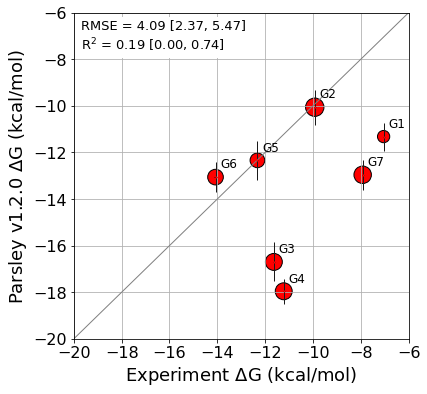

In [6]:
dG_stats = get_stats(experiment["DG"], parsley["DG"], experiment["dDG"], parsley["dDG"])
plot_results(
    dG_stats,
    sizes,
    experiment["DG"], parsley["DG"], 
    experiment["dDG"], parsley["dDG"], 
    "Experiment", "Parsley v1.2.0",
)

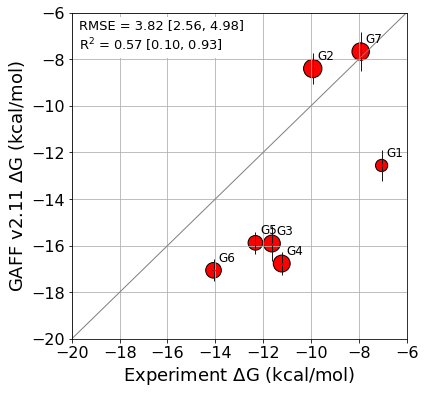

In [7]:
dG_stats = get_stats(experiment["DG"], gaff["DG"], experiment["dDG"], gaff["dDG"])
plot_results(
    dG_stats,
    sizes,
    experiment["DG"], gaff["DG"], 
    experiment["dDG"], gaff["dDG"], 
    "Experiment", "GAFF v2.11",
)

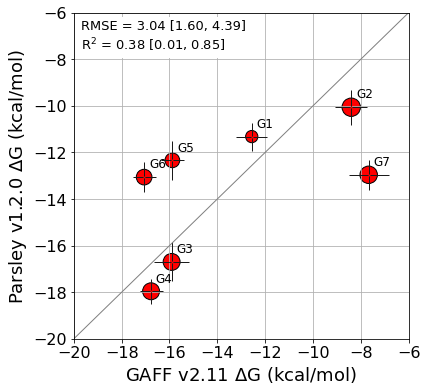

In [8]:
dG_stats = get_stats(gaff["DG"], parsley["DG"], gaff["dDG"], parsley["dDG"])
plot_results(
    dG_stats,
    sizes,
    gaff["DG"], parsley["DG"], 
    gaff["dDG"], parsley["dDG"], 
    "GAFF v2.11", "Parsley v1.2.0", 
)